In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import model as my_model_util

In [2]:
image_height = 544
image_width = 736
n_classes = 7

In [20]:
model = my_model_util.unet_custom(n_classes, image_height, image_width, model_depth=3, dropout=0.1)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 544, 736, 3) 0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 544, 736, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 544, 736, 32) 128         conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation_15 (Activation)      (None, 544, 736, 32) 0           batch_normalization_15[0][0]     
____________________________________________________________________________________________

In [21]:
gen = my_model_util.train_gen("tmp/test/", "tmp/label/", batch_size = 2, \
    n_classes = n_classes, height = image_height, width = image_width)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(gen,steps_per_epoch=50,epochs=3)

Epoch 1/3
14/50 [=======>......................] - ETA: 2:12 - loss: 2.1396 - accuracy: 0.0682

In [18]:
pr = my_model_util.predict_model(model, 'tmp/test/image110.png', n_classes, image_height, image_width)
# import cv2
# import numpy as np

# image = cv2.imread('tmp/test/image10200.png')
# image = np.float32(cv2.resize(image, (image_width, image_height)))
# image = image.astype(np.float32)
# image = image[:, :, ::-1]

# pr = model.predict(np.array([image]))[0]
# pr = pr.reshape((image_height,  image_width, n_classes)).argmax(axis=2)

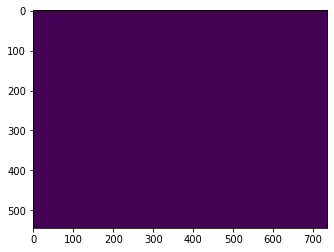

In [19]:
import matplotlib.pyplot as plt
plt.imshow(pr)